In [5]:
import sys
sys.path.append("..")

from models.nn_models import *
from models.datasets import TreePartNetOriginalDataset
from data.utils import distinct_colors

In [4]:
hparams = {'batch_size': 1,
            'lc_count' : 256,
            'input_channels' : 0,
            'use_xyz' : True,
            'lr': 0.001,
            'weight_decay': 0.0,
            'lr_decay': 0.5,
            'decay_step': 3e5,
            'bn_momentum': 0.5,
            'bnm_decay': 0.5,
            'FL_alpha': 253/192,
            'FL_gamma': 2,
            'feature_space_dim':512,
            'leaf_space_threshold':5,
            'feed_leaf_part':False,
            'feed_is_focal':False,
            'use_deep':True,
            'use_fine_leaf_index':False,
            'train_data': '/space/ariyanzarei/sorghum_segmentation/dataset/2022-03-10/sorghum__labeled_train.hdf5',
            'val_data': '/space/ariyanzarei/sorghum_segmentation/dataset/2022-03-10/sorghum__labeled_validation.hdf5',
            'description': ''
            }

In [5]:
treepartnet = TreePartNet(hparams)
print(treepartnet)

TreePartNet(
  (SA_modules): ModuleList(
    (0): PointnetSAModuleMSG(
      (groupers): ModuleList(
        (0): QueryAndGroup()
        (1): QueryAndGroup()
      )
      (mlps): ModuleList(
        (0): Sequential(
          (0): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (5): ReLU(inplace=True)
          (6): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (7): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (8): ReLU(inplace=True)
        )
        (1): Sequential(
          (0): Conv2d(3, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1

In [3]:
dataset = TreePartNetOriginalDataset("/space/ariyanzarei/sorghum_segmentation/dataset/TreePartNetData/tree_labeled_train.hdf5")

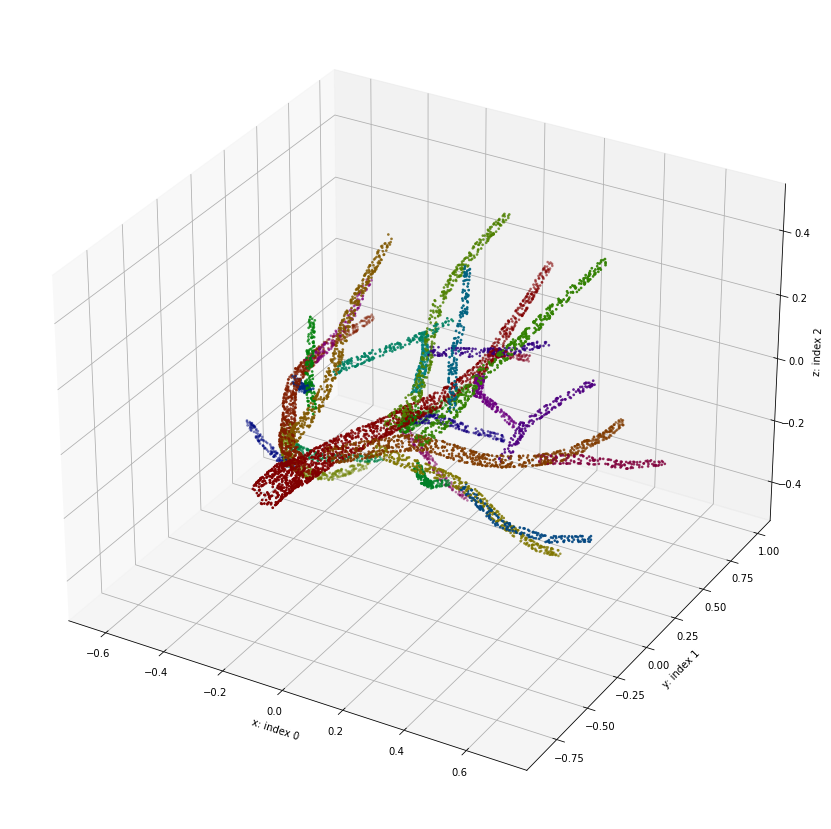

In [19]:

ind = 358

points, is_fork, branch_label, affinity_matrix = dataset[ind]
labels = branch_label.squeeze()

d_colors = distinct_colors(len(set(labels.tolist())))
colors = np.zeros((labels.shape[0], 3))
for i, l in enumerate(list(set(labels.tolist()))):
    colors[labels == l, :] = d_colors[i]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2], s=3, c=colors)
ax.set_xlabel("x: index 0")
ax.set_ylabel("y: index 1")
ax.set_zlabel("z: index 2")
plt.show()